In [122]:
from time import time
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from bert_embedding import BertEmbedding
import itertools
import datetime

from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda
import keras.backend as K
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint

In [169]:
from bert_embedding import BertEmbedding
bert_abstract = """We introduce a new language representation model called BERT.
We introduce a new language representation model calling BERT."""
sentences = bert_abstract.split('\n')
bert_embedding = BertEmbedding()
result = bert_embedding(sentences)

In [185]:
print(result[0][1][8])

0.05427023


In [159]:
#print(bert_abstract)
#print(right_encoded)
print(type(right_encoded[0][1][1]))
tensor= K.variable(right_encoded[0][1][1])
print(type(rightz))

IndexError: list index out of range

In [28]:
# File paths
TRAIN_CSV = '/Users/ishitagupta/Desktop/train.csv'
TEST_CSV = '/Users/ishitagupta/Desktop/test.csv'
EMBEDDING_FILE = '/Users/ishitagupta/CNN_sentence/GoogleNews-vectors-negative300.bin.gz'
MODEL_SAVING_DIR = '/Users/ishitagupta/maLSTM'

In [29]:
# Load training and test set
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

stops = set(stopwords.words('english'))

def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()

    return text

# Prepare embedding
vocabulary = dict()
inverse_vocabulary = ['<unk>']  # '<unk>' will never be used, it is only a placeholder for the [0, 0, ....0] embedding
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

questions_cols = ['question1', 'question2']

# Iterate over the questions only of both training and test datasets
for dataset in [train_df, test_df]:
    for index, row in dataset.iterrows():

        # Iterate through the text of both questions of the row
        for question in questions_cols:

            q2n = []  # q2n -> question numbers representation
            for word in text_to_word_list(row[question]):

                # Check for unwanted words
                if word in stops and word not in word2vec.vocab:
                    continue

                if word not in vocabulary:
                    vocabulary[word] = len(inverse_vocabulary)
                    q2n.append(len(inverse_vocabulary))
                    inverse_vocabulary.append(word)
                else:
                    q2n.append(vocabulary[word])

            # Replace questions as word to question as number representation
            dataset.set_value(index, question, q2n)
            
embedding_dim = 300
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
embeddings[0] = 0  # So that the padding will be ignored

# Build the embedding matrix
for word, index in vocabulary.items():
    if word in word2vec.vocab:
        embeddings[index] = word2vec.word_vec(word)
del word2vec

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [84]:
#print(train_df)
#print(vocabulary)
print(embeddings[1])
print(type)
#print(train_df[questions_cols])

[-0.02502441  0.03320312  0.06201172  0.08203125  0.01470947  0.02319336
 -0.012146   -0.07324219  0.10498047  0.12988281 -0.09716797 -0.13183594
 -0.01574707  0.01141357 -0.11474609  0.03027344  0.11425781  0.07324219
  0.10400391 -0.10644531 -0.03112793 -0.06079102  0.11865234  0.01745605
  0.0859375  -0.00891113  0.02087402  0.24511719  0.01428223  0.13378906
  0.00476074  0.03271484 -0.19238281  0.26953125  0.11230469 -0.06640625
  0.12597656 -0.26171875  0.00717163  0.03149414  0.1484375  -0.11572266
  0.20996094 -0.10009766 -0.0090332   0.07861328  0.0559082   0.06884766
  0.12402344  0.08740234 -0.0050354  -0.09423828 -0.16210938 -0.00576782
  0.09814453  0.05444336  0.04125977 -0.14257812  0.0546875  -0.006073
  0.08105469  0.06298828 -0.04443359 -0.09619141 -0.03564453 -0.02563477
  0.05566406  0.10253906 -0.04638672  0.10058594  0.01208496  0.12011719
 -0.00074768 -0.08105469 -0.09033203 -0.05810547  0.03515625  0.22949219
  0.09033203  0.14160156  0.00485229 -0.09765625  0.1

In [144]:
left_encoded = bert_embedding("hello this is sentence one")
right_encoded = bert_embedding("hello this is sentence two")
left= left_encoded[0][1][0][0]
right= right_encoded[0][1][0][0]
#malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))([left_encoded, right_encoded])
mal_distance= K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))
print(mal_distance)

ValueError: Invalid reduction dimension 1 for input with 0 dimensions. for 'Sum_1' (op: 'Sum') with input shapes: [], [] and with computed input tensors: input[1] = <1>.

In [148]:

                     train_df.question2.map(lambda x: len(x)).max(),
                     test_df.question1.map(lambda x: len(x)).max(),
                     test_df.question2.map(lambda x: len(x)).max())

# Split to train validation
#validation_size = 40000
#training_size = len(train_df) - validation_size

X_train = train_df[questions_cols]
Y_train = train_df['is_duplicate']

X_validation = test_df[questions_cols]
Y_validation = test_df['is_duplicate']

X_test = test_df[questions_cols]
Y_test = test_df['is_duplicate']

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Split to dicts
X_train = {'left': X_train.question1, 'right': X_train.question2}
X_validation = {'left': X_validation.question1, 'right': X_validation.question2}
X_test = {'left': test_df.question1, 'right': test_df.question2}

# Convert labels to their numpy representations
Y_train = Y_train.values
Y_validation = Y_validation.values

# Zero padding
for dataset, side in itertools.product([X_train, X_validation], ['left', 'right']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_seq_length)

# Make sure everything is ok
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(Y_train)

print(X_train['left'].shape)


(66109, 62)


In [186]:
from bert_embedding import BertEmbedding
bert_abstract = """We introduce a new language representation model called BERT.
We introduce a new language representation model calling BERT."""
sentences = bert_abstract.split('\n')
bert_embedding = BertEmbedding()
result = bert_embedding(sentences)

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

mal_distance= exponent_neg_manhattan_distance(result[0][1], result[1][1])
print(mal_distance)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [154]:
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer

left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

#embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length, trainable=False)
#embedding layer modified to use embeddings from BERT

# Embedded version of the inputs  
encoded_left_full = bert_embedding('hello this is the first') #the entire array where first column is the sentence it self 
encoded_left = K.variable(encoded_left_full[0][1][1])
print(type(encoded_left))
encoded_right_full = bert_embedding('right_input')
#encoded_right = K.variable(encoded_right_full[0][1])

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)
print(type(left_output))
# Calculates the distance as defined by the MaLSTM model
malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))([left_output, right_output])
print(malstm)
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Start training
#training_start_time = time()

#malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=batch_size, nb_epoch=n_epoch,
                           # validation_data=([X_validation['left'], X_validation['right']], Y_validation))

#print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

IndexError: list index out of range

Final training accuracy 0.8060243065741102
Final dev/test accuracy 0.73525


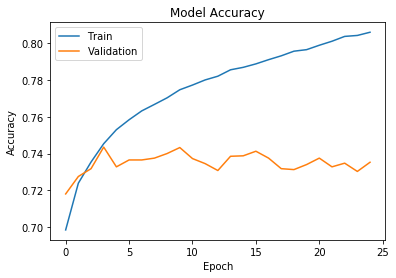

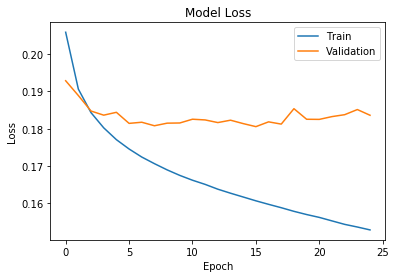

In [31]:
# Plot accuracy
print('Final training accuracy '+ str(malstm_trained.history.get('acc')[-1]))
print('Final dev/test accuracy '+ str(malstm_trained.history.get('val_acc')[-1]))
plt.plot(malstm_trained.history['acc'])
plt.plot(malstm_trained.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained.history['loss'])
plt.plot(malstm_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()